In [1]:
import pandas as pd
import numpy as np
import yaml
import copy
import matplotlib
import matplotlib.pyplot as plt
import warnings
import random
import collections
warnings.filterwarnings("ignore")
matplotlib.use('TkAgg')
import networkx as nx
%matplotlib inline

In [2]:
pwd

'/Users/nishant/Desktop/PNNL-2019/December_codes'

In [3]:
def import_network(path):
    """
    path = path to network data
    df = imported network data as a pandas dataframe
    """
    
    df = pd.read_csv(path, sep=" ", 
                 header=None,
                 names=['layer','node1','node2','weight'])
    
    return df


def create_edge_list(df, n_layers):
    
    edges = []
    for i in range(n_layers):
        edges.append(list(zip(df["node1"][df.layer==i+1], df["node2"][df.layer==i+1])))
    
    return edges

def create_node_list(df, which_layer):
    
    temp = list(set(df.node1[df.layer==which_layer]))
    temp2 = list(set(df.node2[df.layer==which_layer]))
    node_list = list(set(temp+temp2))
    
    return node_list


def calculate_gc_size(graph):
    """
    gc = giant component
    """
    
    gc_size = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)][0]
    
    return gc_size


def normalize_gc_list(gc_list):
    "calculates gc size as a fraction of initial gc"
    
    return np.array(gc_list)/max(gc_list)



In [4]:
if __name__ == "__main__":
    
    config_file = '/Users/nishant/Desktop/PNNL-2019/config.yml'
    
    with open(config_file, 'r') as f:
        config = yaml.safe_load(f)
        path = config['path']
        n_layers = config['n_layers']
        df = import_network(path)
        edge_list = create_edge_list(df, n_layers)

In [5]:
"""CREATE EDGE LIST"""

edge_list_1 = edge_list[0]
edge_list_2 = edge_list[1]
edge_list_3 = edge_list[2]

agg_edges = list(set(edge_list_1 + edge_list_2 + edge_list_3))

print(len(edge_list_1))
print(len(edge_list_2))
print(len(edge_list_3))
print(len(agg_edges))

312
83
46
430


In [6]:
"""CREATE NODE LISTS"""

node_list_1 = create_node_list(df, 1)
node_list_2 = create_node_list(df, 2)
node_list_3 = create_node_list(df, 3)

print(len(node_list_1))
print(len(node_list_2))
print(len(node_list_3))

271
83
45


In [7]:
G1 = nx.Graph()
G1.add_edges_from(edge_list_1)

G2 = nx.Graph()
G2.add_edges_from(edge_list_2)

G3 = nx.Graph()
G3.add_edges_from(edge_list_3)

agg_G = nx.Graph()
agg_G.add_edges_from(agg_edges)


In [8]:
"""PICK THE GRAPH TO ANALYZE """

which_graph = 4

"""
which_graph:

1: layer 1 (underground)
2: layer 2 (overground)
3: layer 3 (DLR)
4: Aggregated 
5: Mplex (not working here)

"""


if which_graph == 1:
    G = G1
    node_list = node_list_1

elif which_graph == 2:
    G = G2
    node_list = node_list_2
    
elif which_graph == 3:
    G = G3
    node_list = node_list_3
    
elif which_graph == 4:
    G = agg_G
    node_list = list(G.nodes())
    
elif which_graph == 5:
    G = mplex_G
    node_list = list(G.nodes())


edge_list = list(G.edges)

print('Nodes: ', len(node_list))
print('Edges: ', len(edge_list))

Nodes:  369
Edges:  430


In [9]:
"""
calculate initial giant component (gc) size
"""

initial_gc_size = calculate_gc_size(G)
print(initial_gc_size)


369


In [10]:
# """Create Ensemble Lists of Nodes to Remove for Random Failure"""

# node_list = list(G.nodes())
# node_list_copy = copy.deepcopy(node_list)

# #n_nodes_to_remove = len(node_list)
# n_nodes_to_remove = 65

# sorted_nodes_by_random = []

# for i in range(10):
#     sorted_nodes_by_random.append(random.sample(node_list_copy, n_nodes_to_remove))


# print(len(sorted_nodes_by_random[0]))
# print(len(sorted_nodes_by_random))

## FAILURE PART OF THE PLOT

In [11]:
def remove_nodes(G, nodes_to_remove, edge_list):

    """
    nodes_to_remove: list

    edge_list: for this layer the orginal list of tuples (edges)
                e.g. [(1,77), (4,13)..]

    returns list of GC sizes and the graph remaining 
    """

    
    """initialize updated_edges list with original edge_list"""
    updated_edges = copy.deepcopy(edge_list)
    
    """initialize updated_G with orginial graph G"""
    updated_G = copy.deepcopy(G)
    initial_gc_size = calculate_gc_size(G)
    
    """empty list which will capture gc size as the network fails"""
    gc_list = []
    gc_list.append(initial_gc_size)
    count = 0

    for node in nodes_to_remove:
        
        updated_G.remove_edges_from(list(G.edges(node)))
        
        gc_list.append(calculate_gc_size(updated_G))
        updated_G.remove_node(node)
    
        count +=1
    
    #else:
    if len(nodes_to_remove) == len(node_list):
        gc_list.append(0)
    
    return gc_list, updated_G, count


In [12]:
# """BETWEENNESS"""
# betweenness_c = nx.betweenness_centrality(G)
# temp = sorted(betweenness_c.items(), key=lambda kv: kv[1], reverse=True)
# sorted_nodes_by_betweenness = [i[0] for i in temp]
# print(len(sorted_nodes_by_betweenness))


In [13]:
# """Betweenness"""
# nodes_to_remove = sorted_nodes_by_betweenness
# gc_list_by_betweenness, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)
# gc_list_by_betweenness = normalize_gc_list(gc_list_by_betweenness)


In [14]:
"""LIST OF AFFECTED NODES BY FLOODS"""

if which_graph == 1:
    
    #layer 1
    node_list_floods = [106, 6,221,345,35,180,56,69,343,44,261,57,102,214,70,176,277,257,351,90,105,132,172,316,195,202,203,349,328,241,319]

if which_graph == 2:
    
    #layer 2
    node_list_floods = [337, 103, 333, 129, 254, 218]

if which_graph == 3:
    
    #layer 3
    node_list_floods = [352, 347, 12, 65, 290, 324,50,51,325,146,66,104,239,107,108,142,323,136,137,256,143,144,145,154,197,155,269,291]

if which_graph == 4:

    #aggregate and 
    node_list_floods = [106, 6, 221, 345, 35, 180, 56, 69, 343, 44, 261, 57, 102, 214, 70, 176, 277, 257, 351, 90, 105, 132, 172, 316, 195, 202, 203, 349, 328, 241, 319, 337, 103, 333, 129, 254, 218, 352, 347, 12, 65, 290, 324, 50, 51, 325, 146, 66, 104, 239, 107, 108, 142, 323, 136, 137, 256, 143, 144, 145, 154, 197, 155, 269, 291]

    
len(node_list_floods)

65

In [15]:
# # """FLOOD FAILURE - GEO CLOSEST"""

near_1 = [6,345,328,221,203,172, 254, 351, 319,214, 180, 343, 277, 35, 56, 57, 337, 333, 256, 144, 65, 66, 108, 323, 291, 269, 106]

near_2 = [44,46,316,255,129,349,70,69,103,137,145,104,239,102,324,290,105,107,143,325,50,51,146]

near_3 = [195,196,261,202,204,154,176,155,136,12,90,347,352,218,197]

print(len(near_1))
print(len(near_2))
print(len(near_3))
print(len(near_1)+len(near_2)+len(near_3))


sorted_nodes_by_floods = []

n_iter = 10

# # 100 ensembles of flooded nodes
# for i in range(n_iter):
    
#     temp = random.sample(near_1, len(near_1)) + random.sample(near_2, len(near_2)) + random.sample(near_3, len(near_3))
#     sorted_nodes_by_floods.append(temp)

# gc_list_by_floods = []
# updated_G_list = []


# #100 ensemble failure due to floods(geo)
# for i in range(n_iter):
#     nodes_to_remove = sorted_nodes_by_floods[i]
#     gc_temp, updated_G_temp, count = remove_nodes(G, nodes_to_remove, edge_list)
#     gc_list_by_floods.append(normalize_gc_list(gc_temp))
#     updated_G_list.append(updated_G_temp)

# print('Number of Affected Nodes: ', len(node_list_floods))
# print(len(gc_list_by_floods))
# print(len(gc_list_by_floods[0]))

27
23
15
65


In [16]:
#sorted_nodes_by_floods[0]

In [19]:
# """FLOOD + TARGETED FAILURE"""

sorted_nodes_by_floods_targeted = []
gc_list_by_floods_targeted = []
updated_G_list = []

# sorted_nodes_by_betweenness = []
# my_dict = nx.betweenness_centrality(G)
# wanted_keys = near_3
# temp = dict((k, my_dict[k]) for k in wanted_keys if k in my_dict)
# sorted_nodes_by_betweenness = sorted(temp, reverse=True, key=lambda k: temp[k])


"""BETWEENNESS"""
betweenness_c = nx.betweenness_centrality(G)
temp = sorted(betweenness_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_betweenness = [i[0] for i in temp]
print(len(sorted_nodes_by_betweenness))



for i in range(n_iter):
    #temp = random.sample(near_1, len(near_1)) + random.sample(near_2, len(near_2[:18])) 
    temp = random.sample(near_1, len(near_1)) 
    
    for node in sorted_nodes_by_betweenness[:46]:
        if node not in temp:
            temp.append(node)
    
    sorted_nodes_by_floods_targeted.append(temp)
    

for i in range(n_iter):
    nodes_to_remove = sorted_nodes_by_floods_targeted[i]
    gc_temp, updated_G_temp, count = remove_nodes(G, nodes_to_remove, edge_list)
    gc_list_by_floods_targeted.append(normalize_gc_list(gc_temp))
    updated_G_list.append(updated_G_temp)   
    
print("temp")
print(len(temp))
print("gc_list_by_floods_targeted")
print(len(gc_list_by_floods_targeted[0]))

369
temp
64
gc_list_by_floods_targeted
66
64


In [20]:
gc_list_by_floods_targeted[0]

array([1.        , 0.99728997, 0.99457995, 0.99186992, 0.98915989,
       0.98102981, 0.91869919, 0.85907859, 0.85636856, 0.84823848,
       0.83197832, 0.79403794, 0.79132791, 0.78861789, 0.78319783,
       0.7804878 , 0.41192412, 0.41192412, 0.40921409, 0.40921409,
       0.40921409, 0.40650407, 0.36856369, 0.36856369, 0.33604336,
       0.33604336, 0.31707317, 0.30894309, 0.30894309, 0.29539295,
       0.24661247, 0.23848238, 0.23848238, 0.23848238, 0.23577236,
       0.23577236, 0.21680217, 0.21680217, 0.21680217, 0.21409214,
       0.21409214, 0.21409214, 0.21409214, 0.21409214, 0.21409214,
       0.21409214, 0.21409214, 0.21409214, 0.21409214, 0.21409214,
       0.21409214, 0.21409214, 0.21409214, 0.21138211, 0.21138211,
       0.21138211, 0.21138211, 0.21138211, 0.21138211, 0.21138211,
       0.21138211, 0.21138211, 0.21138211, 0.21138211, 0.20867209,
       0.20867209])

In [21]:
print('done')

done


In [22]:
"""SAVE FLOOD + TARGETED"""

# np.save('gc_list_by_floods_targeted.npy', gc_list_by_floods_targeted)
# gc_list_by_floods_targeted_mean = np.mean(np.array(gc_list_by_floods_targeted), axis=0)
# np.save('gc_list_by_floods_targeted_mean.npy', gc_list_by_floods_targeted_mean)

'SAVE FLOOD + TARGETED'

In [23]:
pwd

'/Users/nishant/Desktop/PNNL-2019/December_codes'

## RECOVERY PART OF THE PLOT

In [ ]:
def add_nodes(G, updated_G, nodes_to_add, edge_list):
    
    """re: recovery
    """
    
    """initialize the graph object with the graph (updated_G) remaining post failure"""
    re_updated_G = copy.deepcopy(updated_G)
    edges_to_add = copy.deepcopy(edge_list)
     
    """empty list which will capture gc size as the network recovers"""
    re_gc_list = []
    count = 0
    initial_gc_size = calculate_gc_size(G)
    
    if len(nodes_to_remove) == len(node_list):
        re_gc_list.append(0)
    
    for node in nodes_to_add:
        
        re_updated_G.add_node(node)
        re_updated_G.add_edges_from(list(G.edges(node)))
        re_gc_list.append(calculate_gc_size(re_updated_G))
    
    
    re_gc_list.append(initial_gc_size)
    
    return re_gc_list, re_updated_G, count


In [ ]:
# """RECOVERY - FLOODS GEO"""

# re_gc_list_by_floods = []
# re_updated_G_list = []

# for i in range(100):
#     nodes_to_add = sorted_nodes_by_floods[i]
#     re_gc_temp, re_updated_G_temp, count = add_nodes(G, updated_G_list[i], nodes_to_add, edge_list)
#     re_gc_list_by_floods.append(normalize_gc_list(re_gc_temp))
#     re_updated_G_list.append(updated_G_temp)

# print(len(re_gc_list_by_floods))
# print(len(re_gc_list_by_floods[0]))

In [ ]:
# """RECOVERY - FLOODS GEO (REVERSE ORDER)"""

# re_gc_list_by_floods = []
# re_updated_G_list = []

# for i in range(n_iter):
#     sorted_nodes_by_floods[i].reverse()
#     nodes_to_add = sorted_nodes_by_floods[i]
#     re_gc_temp, re_updated_G_temp, count = add_nodes(G, updated_G_list[i], nodes_to_add, edge_list)
#     re_gc_list_by_floods.append(normalize_gc_list(re_gc_temp))
#     re_updated_G_list.append(updated_G_temp)

# print(len(re_gc_list_by_floods))
# print(len(re_gc_list_by_floods[0]))

In [ ]:
#len(re_gc_list_by_floods[0])

In [ ]:
# """Calculate Ensemble Mean - Flood Failure"""

# gc_array_by_floods = np.array(gc_list_by_floods)
# re_gc_array_by_floods = np.array(re_gc_list_by_floods)


# gc_list_by_floods_mean = np.mean(gc_array_by_floods, axis=0)
# re_gc_list_by_floods_mean = np.mean(re_gc_array_by_floods, axis=0)

# print(len(gc_list_by_floods))
# print(len(gc_list_by_floods_mean))

In [24]:
"""Calculate Ensemble Mean - Flood + Targeted"""

gc_array_by_floods_targeted = np.array(gc_list_by_floods_targeted)
#re_gc_array_by_floods_targeted = np.array(re_gc_list_by_floods)

gc_list_by_floods_targeted_mean = np.mean(gc_array_by_floods_targeted, axis=0)
#re_gc_list_by_floods_mean = np.mean(re_gc_array_by_floods, axis=0)

print(len(gc_list_by_floods_targeted))
print(len(gc_list_by_floods_targeted_mean))

ValueError: operands could not be broadcast together with shapes (66,) (65,) 

In [ ]:
pwd

In [ ]:

"""Save GC Size List of Lists"""
#np.save('agg_gc_list_by_floods_geo', gc_array_by_floods)
#np.save('agg_re_gc_list_by_floods_geo', re_gc_array_by_floods)

"""Save Ensemble Mean (a single list)"""
#np.save('agg_gc_list_by_floods_geo_mean', gc_list_by_floods_mean)
#np.save('agg_re_gc_list_by_floods_geo_mean', re_gc_list_by_floods_mean)


In [ ]:
pwd

## PLOTTING

In [23]:
"""fraction of nodes removed on x-axis"""

node_frac = np.arange(len(gc_list_by_floods_targeted[0]))

print(len(node_frac))

66


In [ ]:
plt.figure(figsize=(15,10))

for i in range(100):
    
    plt.subplot(1,2,1)
    plt.plot(node_frac, gc_list_by_floods[i], label='')
    
    plt.ylim(top=1, bottom=0)
    #plt.xlim(left=0, right=1)
    plt.xlabel('No. of Nodes Removed')
    plt.ylabel('Fraction of Initial Giant Component Size')
    plt.title('Failure')
    plt.margins(x=0, y=0)
    #plt.legend()

    plt.subplot(1,2,2)
    plt.plot(node_frac,re_gc_list_by_floods[i], label='')

    #plt.plot(node_frac, node_frac, '--')
    #plt.xlim(left=0)
    plt.ylim(bottom=0, top=1)
    plt.yticks([])
    #plt.xticks([0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel('No. of Nodes Removed')
    plt.title('Reovery')
    plt.margins(x=0, y=0)
    #plt.legend()
 

plt.subplots_adjust(wspace=0)
#plt.suptitle('Random Failure (Ensemble N=1000)', y=0.92, fontsize='16')
plt.show()

In [ ]:
"""Plot Ensemble Mean"""

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.plot(node_frac, gc_list_by_floods_mean, '-', label='#degree')
plt.ylim(top=1, bottom=0)
#plt.xlim(left=0, right=1)
plt.xlabel('Fraction of nodes added')
plt.ylabel('Fraction of Initial Giant Component Size')
plt.margins(x=0, y=0)
#plt.legend()

plt.subplot(1,2,2)
plt.plot(node_frac,re_gc_list_by_floods_mean, label='#degree')
    #plt.plot(node_frac, node_frac, '--')
#plt.xlim(left=0, right=1)
plt.ylim(bottom=0, top=1)
plt.yticks([])
plt.xticks([0.2, 0.4, 0.6, 0.8, 1])
plt.xlabel('Fraction of nodes added')
plt.margins(x=0, y=0)
#plt.legend()
plt.subplots_adjust(wspace=0)

plt.suptitle('Ensemble Mean - Random Failure and Recovery', y=0.92, fontsize='14')
plt.show()

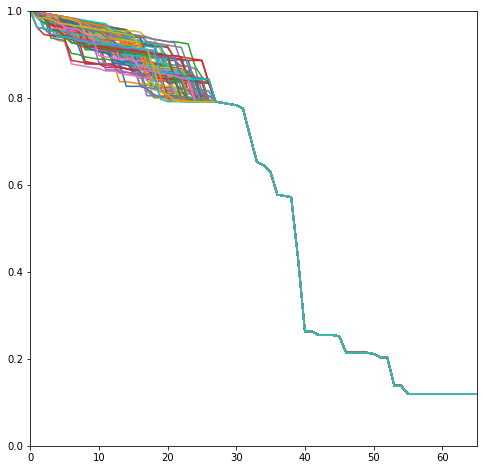

In [25]:
"""FLOOD + TARGETED FAILURE"""

plt.figure(figsize=(8,8))
plt.margins(0)
plt.ylim(top=1, bottom=0)

for i in range(100):
    plt.plot(node_frac, gc_list_by_floods_targeted[i])
    
    
    

In [26]:
pwd

'/Users/nishant/Desktop/PNNL-2019/Topology_Based_Failure'

In [27]:
np.save('gc_list_by_floods_targeted_5', gc_list_by_floods_targeted)
np.save('gc_list_by_floods_targeted_mean_5', gc_list_by_floods_targeted_mean)

In [10]:
nx.average_shortest_path_length(G)

13.732738305643926